# Energy Suppliers on Trustpilot - ML models to predict company answers with sentiment analysis


Author: Matthias Isele

## Data preprocessing and recall of important visualisations

In [22]:
#We start with our processed data set
import pandas as pd

path_colab_online='/content/drive/MyDrive/Supply Chain - Customer Satisfaction/Data/all_suppliers_data_processed.csv'

path_local=r"C:\Users\isele\OneDrive\Dokumente\GitHub\Graduation_Project_Matthias_Isele\notebooks\all_suppliers_data_processed.csv"

path=path_local

df=pd.read_csv(path, index_col=0)
df.head()

,Nickname,Location,Stars,Headline,DoP,DoE,Comment,Answer,DoA,DoE.day,...,DoA.day,DoA.month,DoA.year,Comment_TF,Answer_TF,Company,Words_Headline,Words_Comment,Words_Answer,Response_time
0,Paul,DE,5,Seriös und preiswert:,2023-08-29 15:00:29+00:00,2023-08-29,Seriös und preiswert:nach einer ziemlich unang...,NaN,NaN,29,...,NaN,NaN,NaN,1,0,Octopus Energy Germany,3,62.0,NaN,NaN
1,Anton,DE,5,Tarif mit vernünftigem Preis,2023-08-30 11:20:02+00:00,2023-08-22,Tarif mit vernünftigem Preis bei niedrigem Ein...,NaN,NaN,22,...,NaN,NaN,NaN,1,0,Octopus Energy Germany,4,41.0,NaN,NaN
2,Tobias,DE,5,Ringo Star,2023-08-29 10:00:40+00:00,2023-08-21,"Supi Anbieterwechsel,klappt alles mit dem vora...",NaN,NaN,21,...,NaN,NaN,NaN,1,0,Octopus Energy Germany,2,37.0,NaN,NaN
3,Dirk Meinel,DE,5,Schritt für Schritt transparent,2023-08-30 09:18:07+00:00,2023-08-27,Erstmalig habe ich mich bei Octopus Engergy an...,NaN,NaN,27,...,NaN,NaN,NaN,1,0,Octopus Energy Germany,4,41.0,NaN,NaN
4,Marianne Bäßler,DE,5,HOHE ZUFRIEDENHEIT,2023-08-29 17:30:02+00:00,2023-08-29,HOHE ZUFRIEDENHEIT BEIM NEUEN ANBIETER OCTOPU...,NaN,NaN,29,...,NaN,NaN,NaN,1,0,Octopus Energy Germany,2,70.0,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45135 entries, 0 to 45134
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nickname        45133 non-null  object 
 1   Location        45135 non-null  object 
 2   Stars           45135 non-null  int64  
 3   Headline        45135 non-null  object 
 4   DoP             45135 non-null  object 
 5   DoE             45135 non-null  object 
 6   Comment         38896 non-null  object 
 7   Answer          28533 non-null  object 
 8   DoA             28533 non-null  object 
 9   DoE.day         45135 non-null  int64  
 10  DoE.month       45135 non-null  int64  
 11  DoE.year        45135 non-null  int64  
 12  DoP.day         45135 non-null  int64  
 13  DoP.month       45135 non-null  int64  
 14  DoP.year        45135 non-null  int64  
 15  DoA.day         28533 non-null  float64
 16  DoA.month       28533 non-null  float64
 17  DoA.year        28533 non-null  floa

In [25]:
#We focus on word counts and stars
keep=['Stars','Headline','Comment','Answer','Comment_TF','Answer_TF','Company','Words_Comment','Words_Headline','Words_Answer']
df_reduced=df[keep]

#Select rows where comments and answers both exist
df_reduced=df_reduced[(df_reduced['Comment_TF']==1)& (df_reduced['Answer_TF']==1) ]
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25046 entries, 20 to 45132
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stars           25046 non-null  int64  
 1   Headline        25046 non-null  object 
 2   Comment         25046 non-null  object 
 3   Answer          25046 non-null  object 
 4   Comment_TF      25046 non-null  int64  
 5   Answer_TF       25046 non-null  int64  
 6   Company         25046 non-null  object 
 7   Words_Comment   25046 non-null  float64
 8   Words_Headline  25046 non-null  int64  
 9   Words_Answer    25046 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


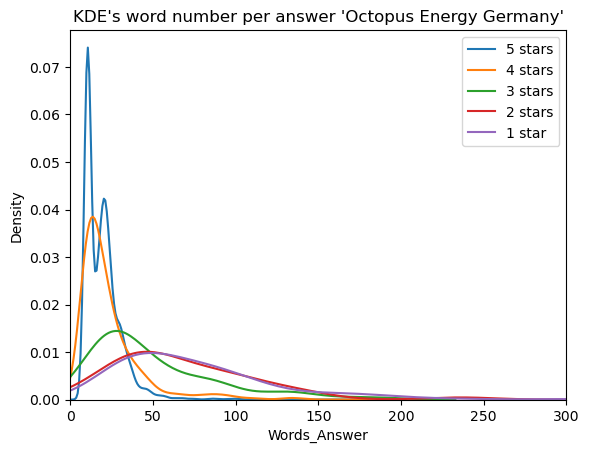

In [26]:
# Recall that companies can have standard answer lengths for specific star ratings.
# The answer policy is company specific.

import matplotlib.pyplot as plt
import seaborn as sns

#Octopus Energy
for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  sns.kdeplot((df_reduced[(df_reduced['Stars']== s)&(df_reduced['Company']== 'Octopus Energy Germany')])['Words_Answer'], label=label)
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per answer 'Octopus Energy Germany'");

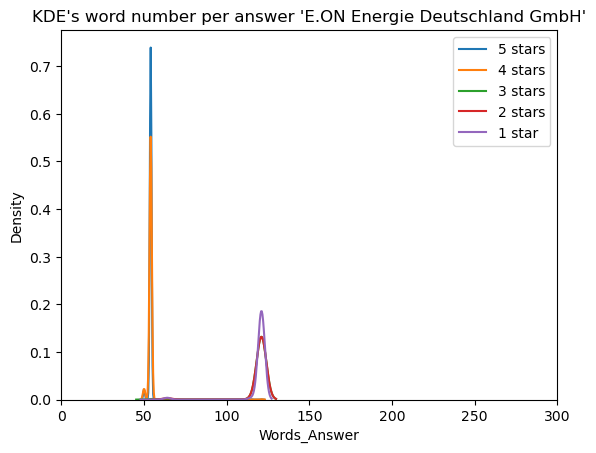

In [27]:
#E.ON Energy

for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  sns.kdeplot((df_reduced[(df_reduced['Stars']== s)&(df_reduced['Company']== 'E.ON Energie Deutschland GmbH')])['Words_Answer'], label=label)
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per answer 'E.ON Energie Deutschland GmbH'");

Text(0.5, 1.0, 'Star count')

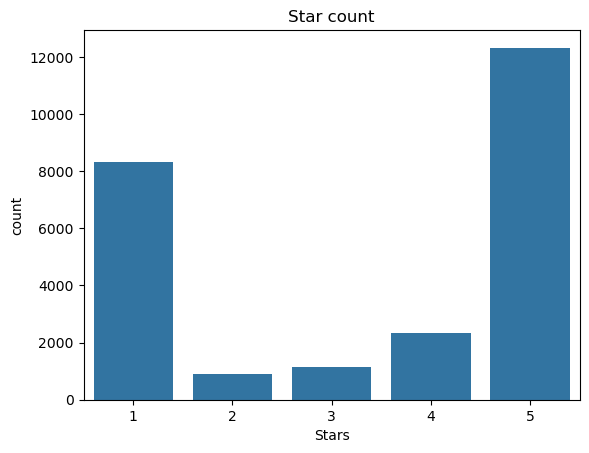

In [28]:
#Star ratings are alost binary

sns.countplot(x=df_reduced['Stars'])
plt.title('Star count')

In [29]:
# Answer length tends to increase with comment length

from scipy.stats import pearsonr

pearsonr(df_reduced['Words_Comment'],df_reduced['Words_Answer'])

PearsonRResult(statistic=0.30678216349113857, pvalue=0.0)

C:\Users\isele\AppData\Local\Temp\ipykernel_9520\1014979345.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x_pdf, y_pdf, 'b', lw=2, linestyle='dashed', label='normal dist.', color='black')


Text(0.5, 1.0, 'Comparison to standard normal distribution')

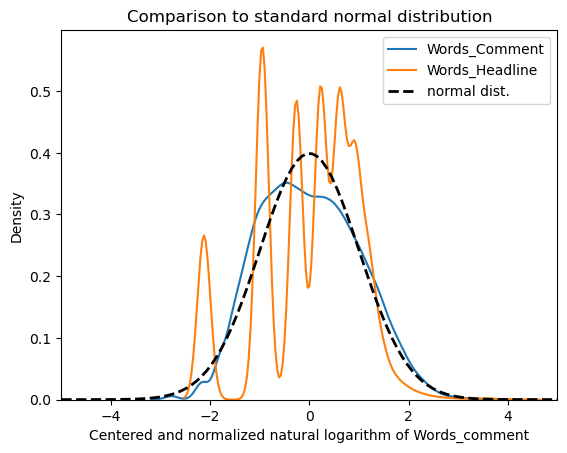

In [30]:
# Words_Comment and Words_headline are lognormal distributed
import numpy as np
from scipy.stats import norm

data=np.log(df_reduced['Words_Comment'])
data_standard_comments=(data-data.mean())/np.std(data-data.mean())
ax=sns.kdeplot(data_standard_comments,log_scale=False, label='Words_Comment')

data=np.log(df_reduced['Words_Headline'])
data_standard_headline=(data-data.mean())/np.std(data-data.mean())
ax=sns.kdeplot(data_standard_headline,log_scale=False, label='Words_Headline')

plt.xlim(-5,5)
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = norm.pdf(x_pdf)

ax.plot(x_pdf, y_pdf, 'b', lw=2, linestyle='dashed', label='normal dist.', color='black')
plt.xlabel('Centered and normalized natural logarithm of Words_comment')
plt.legend()
plt.title("Comparison to standard normal distribution")

Text(0.5, 1.0, 'Histogram and kde for Words_Headline')

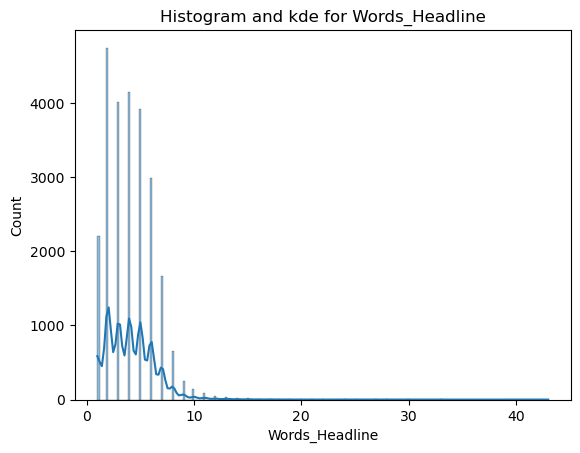

In [31]:
sns.histplot(df_reduced['Words_Headline'],kde=True)
plt.title('Histogram and kde for Words_Headline')

In [32]:
import numpy as np

# Add logarithms to the data set for Words_Headline, Words_Comment (and Words_Answer for completeness)

df_reduced['log_Words_Headline']=np.log(df_reduced['Words_Headline'])
df_reduced['log_Words_Comment']=np.log(df_reduced['Words_Comment'])
df_reduced['log_Words_Answer']=np.log(df_reduced['Words_Answer'])

# Add min-max-scaler on stars column

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_reduced[['Stars']])
df_reduced['Stars_min_max_scaled']=scaler.transform(df_reduced[['Stars']])

# Binary brackets for star rating

df_reduced['Stars_geq3_TF']=[1 if x>2 else 0 for x in df_reduced['Stars']]
df_reduced['Stars_geq4_TF']=[1 if x>3 else 0 for x in df_reduced['Stars']]

# drop Answer_TF and Comment_TF as these are trivial by preselection.
df_ml=df_reduced.drop(['Answer_TF','Comment_TF'],axis=1)

df_ml.info()
df_ml.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25046 entries, 20 to 45132
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stars                 25046 non-null  int64  
 1   Headline              25046 non-null  object 
 2   Comment               25046 non-null  object 
 3   Answer                25046 non-null  object 
 4   Company               25046 non-null  object 
 5   Words_Comment         25046 non-null  float64
 6   Words_Headline        25046 non-null  int64  
 7   Words_Answer          25046 non-null  float64
 8   log_Words_Headline    25046 non-null  float64
 9   log_Words_Comment     25046 non-null  float64
 10  log_Words_Answer      25046 non-null  float64
 11  Stars_min_max_scaled  25046 non-null  float64
 12  Stars_geq3_TF         25046 non-null  int64  
 13  Stars_geq4_TF         25046 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 2.9+ MB


,Stars,Headline,Comment,Answer,Company,Words_Comment,Words_Headline,Words_Answer,log_Words_Headline,log_Words_Comment,log_Words_Answer,Stars_min_max_scaled,Stars_geq3_TF,Stars_geq4_TF
20,1,Schlechter Service bei Anfragen per Mail,Wichtige Anfragen / Änderungen per Mail vom 02...,"Hallo Jörg, vielen Dank für deine Zeit in der ...",Octopus Energy Germany,38.0,6,45.0,1.791759,3.637586,3.806662,0.00,0,0
22,1,ungefragt Duzen und Gendersprache!,ich habe es schon bereut diesen Anbieter gewäh...,"Hallo Thomas, vielen Dank für deine Zeit, die ...",Octopus Energy Germany,45.0,4,50.0,1.386294,3.806662,3.912023,0.00,0,0
40,4,Willkommen,Der Wechsel war sehr einfach und verlief probl...,"Hallo Kirsten,vielen Dank für deine gute Bewer...",Octopus Energy Germany,22.0,1,24.0,0.000000,3.091042,3.178054,0.75,1,1
41,4,Der Anbieterwechsel klappt super,Der Anbieterwechsel (Papierkram) hat super gek...,"Hallo Thomas,danke dir vielmals für die gute B...",Octopus Energy Germany,19.0,4,12.0,1.386294,2.944439,2.484907,0.75,1,1
49,4,Bis jetzt war alles zufriedenstellend,Bis jetzt war alles zufriedenstellend Vom Erst...,"Hallo Heiko,vielen Dank für deine gute Bewertu...",Octopus Energy Germany,27.0,5,24.0,1.609438,3.295837,3.178054,0.75,1,1


In [118]:
#from google.colab import drive
#drive.mount('/content/drive')
#df_ml.to_csv('/content/drive/My Drive/df_ml.csv', index=False)

In [122]:
keep=['Stars','Headline','Comment','Answer','Comment_TF','Answer_TF','Company','Words_Comment','Words_Headline','Words_Answer']
df_reduced=df[keep]

#Select rows where comments exist
df_reduced=df_reduced[df_reduced['Comment_TF']==1]

import numpy as np

# Add logarithms to the data set for Words_Headline, Words_Comment (and Words_Answer for completeness)

df_reduced['log_Words_Headline']=np.log(df_reduced['Words_Headline'])
df_reduced['log_Words_Comment']=np.log(df_reduced['Words_Comment'])
df_reduced['log_Words_Answer']=np.log(df_reduced['Words_Answer'])

# Add min-max-scaler on stars column

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_reduced[['Stars']])
df_reduced['Stars_min_max_scaled']=scaler.transform(df_reduced[['Stars']])

# Binary brackets for star rating

df_reduced['Stars_geq3_TF']=[1 if x>2 else 0 for x in df_reduced['Stars']]
df_reduced['Stars_geq4_TF']=[1 if x>3 else 0 for x in df_reduced['Stars']]

# drop Answer_TF and Comment_TF as these are trivial by preselection.
df_ml_no_answer_selection=df_reduced.drop(['Answer_TF','Comment_TF'],axis=1)

df_ml_no_answer_selection.info()

#df_ml_no_answer_selection.to_csv('/content/drive/My Drive/df_ml_no_answer_selection.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 38896 entries, 0 to 45134
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stars                 38896 non-null  int64  
 1   Headline              38896 non-null  object 
 2   Comment               38896 non-null  object 
 3   Answer                25046 non-null  object 
 4   Company               38896 non-null  object 
 5   Words_Comment         38896 non-null  float64
 6   Words_Headline        38896 non-null  int64  
 7   Words_Answer          25046 non-null  float64
 8   log_Words_Headline    38896 non-null  float64
 9   log_Words_Comment     38896 non-null  float64
 10  log_Words_Answer      25046 non-null  float64
 11  Stars_min_max_scaled  38896 non-null  float64
 12  Stars_geq3_TF         38896 non-null  int64  
 13  Stars_geq4_TF         38896 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 4.5+ MB


## Predicting star rating with sentiment analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# We start with our preprocessed data set
path_colab_online='/content/drive/MyDrive/Supply Chain - Customer Satisfaction/Data/all_suppliers_data_processed.csv'

path_local=r"C:\Users\isele\OneDrive\Dokumente\GitHub\Graduation_Project_Matthias_Isele\notebooks\all_suppliers_data_processed.csv"

path=path_local
df=pd.read_csv(path, index_col=0)



# We focus on word counts and stars
keep=['Stars','Headline','Comment','Answer','Comment_TF','Answer_TF','Company','Words_Comment','Words_Headline','Words_Answer']
df_reduced=df[keep]

# Select rows where comments exist and drop 'Comment_TF' variable, as it is now trivial
df_reduced=df_reduced[df_reduced['Comment_TF']==1 ].drop(['Comment_TF'],axis=1)

# Add logarithms to the data set for Words_Headline, Words_Comment (and Words_Answer for completeness)
df_reduced['log_Words_Headline']=np.log(df_reduced['Words_Headline'])
df_reduced['log_Words_Comment']=np.log(df_reduced['Words_Comment'])
df_reduced['log_Words_Answer']=np.log(df_reduced['Words_Answer'])

# Add min-max-scaler on stars column
scaler=MinMaxScaler()
scaler.fit(df_reduced[['Stars']])
df_reduced['Stars_min_max_scaled']=scaler.transform(df_reduced[['Stars']])

# Binary brackets for star rating
df_reduced['Stars_geq3_TF']=[1 if x>2 else 0 for x in df_reduced['Stars']]
df_reduced['Stars_geq4_TF']=[1 if x>3 else 0 for x in df_reduced['Stars']]

# See results
df_ml_rating=df_reduced
df_ml_rating.info()
df_ml_rating.head()


<class 'pandas.core.frame.DataFrame'>
Index: 38896 entries, 0 to 45134
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stars                 38896 non-null  int64  
 1   Headline              38896 non-null  object 
 2   Comment               38896 non-null  object 
 3   Answer                25046 non-null  object 
 4   Answer_TF             38896 non-null  int64  
 5   Company               38896 non-null  object 
 6   Words_Comment         38896 non-null  float64
 7   Words_Headline        38896 non-null  int64  
 8   Words_Answer          25046 non-null  float64
 9   log_Words_Headline    38896 non-null  float64
 10  log_Words_Comment     38896 non-null  float64
 11  log_Words_Answer      25046 non-null  float64
 12  Stars_min_max_scaled  38896 non-null  float64
 13  Stars_geq3_TF         38896 non-null  int64  
 14  Stars_geq4_TF         38896 non-null  int64  
dtypes: float64(6), int64(5),

,Stars,Headline,Comment,Answer,Answer_TF,Company,Words_Comment,Words_Headline,Words_Answer,log_Words_Headline,log_Words_Comment,log_Words_Answer,Stars_min_max_scaled,Stars_geq3_TF,Stars_geq4_TF
0,5,Seriös und preiswert:,Seriös und preiswert:nach einer ziemlich unang...,NaN,0,Octopus Energy Germany,62.0,3,NaN,1.098612,4.127134,NaN,1.0,1,1
1,5,Tarif mit vernünftigem Preis,Tarif mit vernünftigem Preis bei niedrigem Ein...,NaN,0,Octopus Energy Germany,41.0,4,NaN,1.386294,3.713572,NaN,1.0,1,1
2,5,Ringo Star,"Supi Anbieterwechsel,klappt alles mit dem vora...",NaN,0,Octopus Energy Germany,37.0,2,NaN,0.693147,3.610918,NaN,1.0,1,1
3,5,Schritt für Schritt transparent,Erstmalig habe ich mich bei Octopus Engergy an...,NaN,0,Octopus Energy Germany,41.0,4,NaN,1.386294,3.713572,NaN,1.0,1,1
4,5,HOHE ZUFRIEDENHEIT,HOHE ZUFRIEDENHEIT BEIM NEUEN ANBIETER OCTOPU...,NaN,0,Octopus Energy Germany,70.0,2,NaN,0.693147,4.248495,NaN,1.0,1,1


### Sentiment analysis of Comments (over all suppliers)

In [ ]:
# We only use the 'Comment' column for sentiment analysis.
# The the target variable will be the boolean variable 'Stars_geq4_TF'.
df_ml_sa=df_ml_rating[['Comment','Stars_geq4_TF']]

# Replace all non letters with empty space in Comment with regex
# Transfer letters to lowercase and remove words of length 2 or less
import re
df_ml_sa['Comment_alpha']=df_ml_sa['Comment']\
  .apply(lambda x: re.sub(r'[^a-zA-ZäüöÄÜÖß]+', ' ', x).lower())\
  .apply(lambda x: re.sub(r'\s[a-zäöü]{1}\s', ' ', x))\
  .apply(lambda x: re.sub(r'\s[a-zäöü]{2}\s', ' ', x))

# import stop german words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('german')

# Remove stop words of Comment and replace special characters
special_char_map = {ord('ä'):'ae', ord('ü'):'ue', ord('ö'):'oe', ord('ß'):'ss'}
df_ml_sa['Comment_no_stopwords']=df_ml_sa['Comment_alpha']\
  .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]).translate(special_char_map))

display(df_ml_sa.head())

# Sentiment analysis and model training with CountVectorizer ans GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

#Choose data and target
data=df_ml_sa['Comment_no_stopwords']
target=df_ml_sa['Stars_geq4_TF']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# Initialize a vectorizer object
vectorizer = CountVectorizer()

# Update the value of X_train and X_test
X_train = np.asarray(vectorizer.fit_transform(X_train).todense())
X_test = np.asarray(vectorizer.transform(X_test).todense())

# Create a clf classifier and train the model on the training set
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)\
  .fit(X_train, y_train)

# Calculate predictions
y_pred = clf.predict(X_test)

# Confusion matrix
confusion_matrix_sa = pd.crosstab(y_test, y_pred, rownames=['Actual class'], colnames=['Predicted clas'])
confusion_matrix_sa

C:\Users\isele\AppData\Local\Temp\ipykernel_3188\3369999814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_sa['Comment_alpha']=df_ml_sa['Comment']\
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\isele\AppData\Local\Temp\ipykernel_3188\3369999814.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_sa['Comment_no_stopwords']=df_ml_sa['Comment_alpha']\


,Comment,Stars_geq4_TF,Comment_alpha,Comment_no_stopwords
0,Seriös und preiswert:nach einer ziemlich unang...,1,seriös und preiswert nach einer ziemlich unang...,serioes preiswert ziemlich unangemessenen prei...
1,Tarif mit vernünftigem Preis bei niedrigem Ein...,1,tarif mit vernünftigem preis bei niedrigem ein...,tarif vernuenftigem preis niedrigem einmalbonu...
2,"Supi Anbieterwechsel,klappt alles mit dem vora...",1,supi anbieterwechsel klappt alles mit dem vora...,supi anbieterwechsel klappt voraussichtlichen ...
3,Erstmalig habe ich mich bei Octopus Engergy an...,1,erstmalig habe ich mich bei octopus engergy an...,erstmalig octopus engergy angemeldet ganze anm...
4,HOHE ZUFRIEDENHEIT BEIM NEUEN ANBIETER OCTOPU...,1,hohe zufriedenheit beim neuen anbieter octopus...,hohe zufriedenheit beim neuen anbieter octopus...


In [ ]:
# Comparison to logistic regression on numerical variables
# Choose data and target
data_columns=['log_Words_Comment','log_Words_Headline']
data=df_ml_rating[data_columns]

target=df_ml_rating['Stars_geq4_TF']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# Standard scale the columns ['log_Words_Comment','log_Words_Headline']
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train[['log_Words_Comment','log_Words_Headline']])
X_train_scaled=X_train
X_test_scaled=X_test
X_train_scaled[['log_Words_Comment','log_Words_Headline']]=scale.transform(X_train[['log_Words_Comment','log_Words_Headline']])
X_test_scaled[['log_Words_Comment','log_Words_Headline']]=scale.transform(X_test[['log_Words_Comment','log_Words_Headline']])

# Modelling with logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg.coef_

# Confusion matrix of prediction for test set
y_pred_test=logreg.predict(X_test_scaled)
pd.crosstab(y_pred_test,y_test)

## Predicting answers


### For E.ON Energy

In [7]:
# Restricting the data set to E.ON Energy
#path_colab_online='/content/drive/MyDrive/Supply Chain - Customer Satisfaction/Data/all_suppliers_data_processed.csv'
path_local=r"C:\Users\isele\OneDrive\Dokumente\GitHub\Graduation_Project_Matthias_Isele\notebooks\df_ml.csv"

path=path_local
df_ml=pd.read_csv(path, index_col=0)

df_ml_EON=df_ml[df_ml['Company']== 'E.ON Energie Deutschland GmbH']
df_ml_EON.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4965 entries, 5 to 1
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Headline              4965 non-null   object 
 1   Comment               4965 non-null   object 
 2   Answer                4965 non-null   object 
 3   Company               4965 non-null   object 
 4   Words_Comment         4965 non-null   float64
 5   Words_Headline        4965 non-null   int64  
 6   Words_Answer          4965 non-null   float64
 7   log_Words_Headline    4965 non-null   float64
 8   log_Words_Comment     4965 non-null   float64
 9   log_Words_Answer      4965 non-null   float64
 10  Stars_min_max_scaled  4965 non-null   float64
 11  Stars_geq3_TF         4965 non-null   int64  
 12  Stars_geq4_TF         4965 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 543.0+ KB


#### Classification of Answers and first prediction with logistic regression

In [9]:
# E.ON Energy seems to have standard answer lengths for 1-3 stars and 4-5 stars.
# We should use the binary star column 'Stars_geq4_TF'.

df_ml_EON.groupby(['Stars'])['Words_Answer'].mean()

Stars
1    119.698522
2    119.702703
3    119.543974
4     53.933514
5     53.982359
Name: Words_Answer, dtype: float64

In [11]:
# Standard answer for 1-3 stars:
pd.set_option('display.max_colwidth', None)
(df_ml_EON[(df_ml_EON['Stars_geq4_TF']==0)&(df_ml_EON['Words_Answer']==121)]['Answer']).head(1)

Stars
3     Lieber Trustpilot Nutzer,  vielen Dank für deine offenen Worte. Es tut uns sehr leid, dass du dich im Moment über uns ärgerst. Danke, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Du ahnst es wahrscheinlich schon: Weil wir hier auf einer externen Bewertungsplattform sind, liest du eine automatisierte Antwort. Trotzdem hilfst du uns mit deiner Nachricht sehr unseren Service und unsere Produkte weiter zu verbessern. Solltest du offene Fragen haben, beantwortet unser Kundenservice diese gern.  Dazu ein kleiner Hinweis: Aktuell erreichen uns sehr viele Kundenanfragen, so dass es zu längeren Wartezeiten auf all unseren Servicekanälen kommt. Dafür bitten wir um Entschuldigung und bedanken uns für deine Geduld. Herzliche Grüße deine E.ON Energie Deutschland
Name: Answer, dtype: object

In [13]:
# Standard answer for 4-5 stars:
(df_ml_EON[(df_ml_EON['Stars_geq4_TF']==1)&(df_ml_EON['Words_Answer']==54)]['Answer']).head(1)

Stars
5     Lieber Trustpilot Nutzer, wir freuen uns sehr, dass du zufrieden mit uns bist! Herzlichen Dank für dein positives Feedback und dafür, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Damit hilfst du uns, unseren Service und unsere Produkte weiter zu verbessern.  Viele Grüße deine E.ON Energie Deutschland
Name: Answer, dtype: object

In [15]:
# All standard answers:
answer_list=df_ml_EON['Answer'].unique()
df_answer_category = pd.DataFrame(answer_list, columns=['Answer'])
df_answer_category['Answer_label']=[1,0,1,0,1,0]
df_answer_category=df_answer_category.set_index('Answer')
df_answer_category

,Answer_label
Answer,
"Lieber Trustpilot Nutzer, wir freuen uns sehr, dass du zufrieden mit uns bist! Herzlichen Dank für dein positives Feedback und dafür, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Damit hilfst du uns, unseren Service und unsere Produkte weiter zu verbessern. Viele Grüße deine E.ON Energie Deutschland",1
"Lieber Trustpilot Nutzer, vielen Dank für deine offenen Worte. Es tut uns sehr leid, dass du dich im Moment über uns ärgerst. Danke, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Du ahnst es wahrscheinlich schon: Weil wir hier auf einer externen Bewertungsplattform sind, liest du eine automatisierte Antwort. Trotzdem hilfst du uns mit deiner Nachricht sehr unseren Service und unsere Produkte weiter zu verbessern. Solltest du offene Fragen haben, beantwortet unser Kundenservice diese gern. Dazu ein kleiner Hinweis: Aktuell erreichen uns sehr viele Kundenanfragen, so dass es zu längeren Wartezeiten auf all unseren Servicekanälen kommt. Dafür bitten wir um Entschuldigung und bedanken uns für deine Geduld. Herzliche Grüße deine E.ON Energie Deutschland",0
"Lieber Trustpilot Nutzer,wir freuen uns sehr, dass du zufrieden mit uns bist! Herzlichen Dank für dein positives Feedback und dafür, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Damit hilfst du uns, unseren Service und unsere Produkte weiter zu verbessern. Viele Grüße deine E.ON Energie Deutschland",1
"Lieber Trustpilot Nutzer, vielen Dank für deine offenen Worte. Es tut uns sehr leid, dass du dich im Moment über uns ärgerst. Danke, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Du ahnst es wahrscheinlich schon: Weil wir hier auf einer externen Bewertungsplattform sind, liest du eine automatisierte Antwort. Trotzdem hilfst du uns mit deiner Nachricht sehr unseren Service und unsere Produkte weiter zu verbessern. Solltest du offene Fragen haben, beantwortet unser Kundenservice diese gern. Dazu ein kleiner Hinweis: Aktuell erreichen uns sehr viele Kundenanfragen, so dass es zu längeren Wartezeiten auf all unseren Servicekanälen kommt. Dafür bitten wir um Entschuldigung und bedanken uns für deine Geduld.Herzliche Grüße deine E.ON Energie Deutschland",0
"Lieber Trustpilot Nutzer,wir freuen uns sehr, dass du zufrieden mit uns bist! Herzlichen Dank für dein positives Feedback und dafür, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Damit hilfst du uns, unseren Service und unsere Produkte weiter zu verbessern.Viele Grüße deine E.ON Energie Deutschland",1
"Lieber Trustpilot Nutzer, vielen Dank für deine offenen Worte. Es tut uns sehr leid, dass du dich im Moment über uns ärgerst. Danke, dass du dir die Zeit für eine Bewertung hier auf Trustpilot genommen hast. Damit hilfst du uns, unseren Service und unsere Produkte weiter zu verbessern. Solltest du offene Fragen haben, beantwortet unser Kundenservice diese gern. Herzliche Grüße deine E.ON Energie Deutschland",0


In [17]:
# There are only two nonequivalent answers. We create labels 1 and 0 for them.
df_ml_EON['Answer_label']=df_ml_EON['Answer'].apply(lambda x: df_answer_category['Answer_label'][x])

C:\Users\isele\AppData\Local\Temp\ipykernel_2148\1430285986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_EON['Answer_label']=df_ml_EON['Answer'].apply(lambda x: df_answer_category['Answer_label'][x])


In [19]:
# The answers correlate strongly with 'Stars_geq4_TF'.
df_ml_EON['Answer_label']
pearsonr(df_ml_EON['Stars_geq4_TF'],df_ml_EON['Answer_label'])

NameError: name 'pearsonr' is not defined

In [ ]:
# Outliers
# If Company answers and 'Stars_geq4_TF' are not identcal, then the comment is contrary to the star rating (except in 1 case).
# Hence, we expect that sentiment analysis of comments will improve predictions for answers.

df_ml_EON[df_ml_EON['Answer_label']!=df_ml_EON['Stars_geq4_TF']]

In [ ]:
print("Number of answers that don't align with star rating",len(df_ml_EON[df_ml_EON['Answer_label']!=df_ml_EON['Stars_geq4_TF']]))

In [ ]:
df_ml_EON.info()

In [ ]:
#Choose data and target
data_columns=['log_Words_Comment','log_Words_Headline','Stars_geq4_TF']
data=df_ml_EON[data_columns]

target=df_ml_EON['Answer_label']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# Standard scale the columns ['log_Words_Comment','log_Words_Headline']
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train[['log_Words_Comment','log_Words_Headline']])
X_train_scaled=X_train
X_test_scaled=X_test
X_train_scaled[['log_Words_Comment','log_Words_Headline']]=scale.transform(X_train[['log_Words_Comment','log_Words_Headline']])
X_test_scaled[['log_Words_Comment','log_Words_Headline']]=scale.transform(X_test[['log_Words_Comment','log_Words_Headline']])

display(X_train_scaled.describe())
display(X_test_scaled.describe())


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg.coef_

In [ ]:
# Confusion matrix of prediction for test set
y_pred_test=logreg.predict(X_test_scaled)
pd.crosstab(y_pred_test,y_test)


In [ ]:
# Confusion matrix of prediction for training set
y_pred_train=logreg.predict(X_train_scaled)
pd.crosstab(y_pred_train,y_train)

In [ ]:
# All predictions align with 'Stars_geq4_TF':
display(pd.crosstab(X_train['Stars_geq4_TF'],y_pred_train))
display(pd.crosstab(X_test['Stars_geq4_TF'],y_pred_test))

#### Improving predictions with PCA

In [ ]:
# Idea: Search for hyperplanes (2D and 1D) in data (3D) (Principal Component analysis)

from sklearn.decomposition import PCA

data_3D=data
data_3D[['log_Words_Comment','log_Words_Headline']]=scale.fit_transform(data[['log_Words_Comment','log_Words_Headline']])

# 2D Hyperplane
pca = PCA(n_components = 2)
data_2D = pca.fit_transform(data_3D)

# 1D Hyperplane
pca = PCA(n_components = 1)
data_1D = pca.fit_transform(data_3D)


In [ ]:
# Train and predict logistic regression
logreg_3D=LogisticRegression()
logreg_3D.fit(data_3D, target)
pred_3D=logreg_3D.predict(data_scaled)

logreg_2D=LogisticRegression()
logreg_2D.fit(data_2D, target)
pred_2D=logreg_2D.predict(data_2D)

logreg_1D=LogisticRegression()
logreg_1D.fit(data_1D, target)
pred_1D=logreg_1D.predict(data_1D)

# Confusion matrices

display(pd.crosstab(pred_3D,target))
display(pd.crosstab(pred_2D,target))
display(pd.crosstab(pred_1D,target))

In [ ]:
# A projection onto hyperplanes makes the situation worse.
# One could alter the normalization of data or look for manifolds.
# But the result is already pretty good! Only 9 wrong out of 4965.
# We expect that the only possibility to significantly minimize errors is by sentiment analysis of comments.

####Improving predictions with sentiment analysis

In [ ]:
# Replacing all non letters with empty space in Comment and Headline
# Transfer letters to lowercase and remove words of length 2 or less

import re

df_ml_EON['Comment_alpha']=df_ml_EON['Comment']\
  .apply(lambda x: re.sub(r'[^a-zA-ZäüöÄÜÖß]+', ' ', x).lower())\
  .apply(lambda x: re.sub(r'\s[a-zäöü]{1}\s', ' ', x))\
  .apply(lambda x: re.sub(r'\s[a-zäöü]{2}\s', ' ', x))

df_ml_EON['Headline_alpha']=df_ml_EON['Headline']\
  .apply(lambda x: re.sub(r'[^a-zA-ZäüöÄÜÖß]+', ' ', x).lower())\
  .apply(lambda x: re.sub(r'\s[a-zäöü]{1}\s', ' ', x))\
  .apply(lambda x: re.sub(r'\s[a-zäöü]{2}\s', ' ', x))





In [ ]:
# stop words filtering of Comment and Headline

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')

print(stop_words)

In [ ]:
# Remove stop words of Comment and Headline
# translate special characters

special_char_map = {ord('ä'):'ae', ord('ü'):'ue', ord('ö'):'oe', ord('ß'):'ss'}


df_ml_EON['Comment_no_stopwords']=df_ml_EON['Comment_alpha']\
  .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]).translate(special_char_map))
df_ml_EON['Headline_no_stopwords']=df_ml_EON['Headline_alpha']\
  .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]).translate(special_char_map))

In [ ]:
df_ml_EON[['Comment_no_stopwords','Comment_alpha','Comment','Headline_no_stopwords','Headline_alpha','Headline']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Choose data and target
#data_columns=['Comment_no_stopwords','Headline_no_stopwords']
data_columns=['Comment_no_stopwords']
data=df_ml_EON[data_columns]

target=df_ml_EON['Answer_label']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Initialize a vectorizer object
vectorizer = CountVectorizer()

# Update the value of X_train and X_test
X_train = np.asarray(vectorizer.fit_transform(X_train['Comment_no_stopwords']).todense())
X_test = np.asarray(vectorizer.transform(X_test['Comment_no_stopwords']).todense())


In [ ]:
X_test

In [ ]:
# Create a clf classifier and train the model on the training set
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# Calculate predictions
y_pred = clf.predict(X_test)


In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual class'], colnames=['Predicted clas'])
confusion_matrix


### For Octopus Energy




In [ ]:
# Restricting the data set to Octopus Energy

df_ml_Oct=df_ml[df_ml['Company']== 'Octopus Energy Germany']
df_ml_Oct.info()

In [ ]:
# Recall the distribution of answer lengths for Octopus Energy per star rating
# Except for the 5 and maybe 4 star case there seem to be no standard answers.

import matplotlib.pyplot as plt
import seaborn as sns

#Octopus Energy
for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  sns.kdeplot((df_ml_Oct[(df_ml_Oct['Stars']== s)])['Words_Answer'], label=label)
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per answer 'Octopus Energy Germany'");

In [ ]:
Stars=[]
Total_answers=[]
Unique_answers=[]
Percentage=[]

# 1 to 5 stars
for s in reversed(range(1,6)):
  unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']== s)])['Answer'].unique())
  number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']== s)])['Answer'])
  percentage=100*unique_answers/number_answers

  Stars.append(s)
  Total_answers.append(number_answers)
  Unique_answers.append(unique_answers)
  Percentage.append(percentage)

# 4 to 5 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>3)])['Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>3)])['Answer'])
percentage=100*unique_answers/number_answers

Stars.append('4 to 5')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 3 to 5 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>2)])['Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>2)])['Answer'])
percentage=100*unique_answers/number_answers

Stars.append('3 to 5')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 1 to 3 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<4)])['Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<4)])['Answer'])
percentage=100*unique_answers/number_answers

Stars.append('1 to 3')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 1 to 2 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<3)])['Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<3)])['Answer'])
percentage=100*unique_answers/number_answers

Stars.append('1 to 2')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 1 to 5
unique_answers=len((df_ml_Oct)['Answer'].unique())
number_answers=len((df_ml_Oct)['Answer'])
percentage=100*unique_answers/number_answers

Stars.append('1 to 5')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

df_Oct_answers = pd.DataFrame(list(zip(Stars, Total_answers,Unique_answers,Percentage)), columns=['Stars', 'Total_answers','Unique_answers','Percentage']).set_index('Stars')

print('Answers of Octopus Energy are personalized by a very high degree:')
df_Oct_answers

In [ ]:
Stars=[]
Total_answers=[]
Unique_answers=[]
Percentage=[]

# 1 to 5 stars
for s in reversed(range(1,6)):
  unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']== s)])['Words_Answer'].unique())
  number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']== s)])['Words_Answer'])
  percentage=100*unique_answers/number_answers

  Stars.append(s)
  Total_answers.append(number_answers)
  Unique_answers.append(unique_answers)
  Percentage.append(percentage)

# 4 to 5 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>3)])['Words_Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>3)])['Words_Answer'])
percentage=100*unique_answers/number_answers

Stars.append('4 to 5')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 3 to 5 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>2)])['Words_Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']>2)])['Words_Answer'])
percentage=100*unique_answers/number_answers

Stars.append('3 to 5')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 1 to 3 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<4)])['Words_Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<4)])['Words_Answer'])
percentage=100*unique_answers/number_answers

Stars.append('1 to 3')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 1 to 2 stars
unique_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<3)])['Words_Answer'].unique())
number_answers=len((df_ml_Oct[(df_ml_Oct['Stars']<3)])['Words_Answer'])
percentage=100*unique_answers/number_answers

Stars.append('1 to 2')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

# 1 to 5
unique_answers=len((df_ml_Oct)['Words_Answer'].unique())
number_answers=len((df_ml_Oct)['Words_Answer'])
percentage=100*unique_answers/number_answers

Stars.append('1 to 5')
Total_answers.append(number_answers)
Unique_answers.append(unique_answers)
Percentage.append(percentage)

df_Oct_words_answer = pd.DataFrame(list(zip(Stars, Total_answers,Unique_answers,Percentage)), columns=['Stars', 'Total_answer_length','Unique_answer_length','Percentage']).set_index('Stars')

print('Especially the 4 and 5 star ratings seem to be personalized only by name:')
df_Oct_words_answer

In [ ]:
# Star rating 4 to 5 answers
(df_ml_Oct[(df_ml_Oct['Stars']>3)])['Answer'].unique()

In [ ]:
# star rating 1 to 3 answers
(df_ml_Oct[(df_ml_Oct['Stars']<4)])['Answer'].unique()

In [ ]:
df_ml_Oct.groupby(['Stars'])['Words_Answer'].mean()

In [ ]:
# We won't group the star variable as it has a monotone relationship with means of log answer lengths.
df_ml_Oct.groupby(['Stars'])['log_Words_Answer'].mean()

In [ ]:
df_ml_Oct.info()

#### Predicting answer lengths

In [ ]:
# We try to predict answer lengths with XG Boost.

#Choose data and target
data_columns=['log_Words_Comment','log_Words_Headline','Stars_min_max_scaled']
data=df_ml_Oct[data_columns]

target=df_ml_Oct['log_Words_Answer']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# Standard scale the columns ['log_Words_Comment','log_Words_Headline']
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train[['log_Words_Comment','log_Words_Headline']])
X_train_scaled=X_train
X_test_scaled=X_test
X_train_scaled[['log_Words_Comment','log_Words_Headline']]=scale.transform(X_train[['log_Words_Comment','log_Words_Headline']])
X_test_scaled[['log_Words_Comment','log_Words_Headline']]=scale.transform(X_test[['log_Words_Comment','log_Words_Headline']])

# Standard scale the target variable ['log_Words_Answer']
#scale.fit(y_train)
#y_train_scaled=y_train
#y_test_scaled=y_test
#y_train_scaled[['log_Words_Answer']]=scale.transform(y_train[['log_Words_Answer']])
#y_test_scaled[['log_Words_Answer']]=scale.transform(y_test[['log_Words_Answer']])

display(X_train_scaled.describe())
display(X_test_scaled.describe())
#display(y_train_scaled.describe())
#display(y_test_scaled.describe())


In [ ]:
# XGBoost:

import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

In [ ]:
# Random Forest:

from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()

RFR_model.fit(X_train, y_train)

y_pred = RFR_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))



In [ ]:
# decision tree:

from sklearn.tree import DecisionTreeRegressor

DTR_model=DecisionTreeRegressor()

DTR_model.fit(X_train, y_train)

y_pred = DTR_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

In [ ]:
# linear regression

from sklearn.linear_model import LinearRegression

LR_model=LinearRegression()

LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

In [ ]:
# Custom Model:

print('Uniques of min max scaled star column:',X_train['Stars_min_max_scaled'].unique(),'.')

X_y_train=X_train
X_y_train['log_Words_Answer']=y_train

print('On the training set one has the folllowing mean log word counts of answers per star rating:')

pred_dict=X_y_train.groupby(['Stars_min_max_scaled'])['log_Words_Answer'].mean().to_dict()

print(pred_dict)

print('We will use these means as predictions on the test set:')

y_pred = X_test['Stars_min_max_scaled'].apply(lambda x: pred_dict[x])

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))


In [ ]:
# Linear regression performs the best. Maybe plot answer lengths over features.

#### Improving Prediction with sentiment analysis

In [ ]:
# Replacing all non letters with empty space in Comment and Headline
# Transfer letters to lowercase and remove words of length 2 or less

import re

df_ml_Oct['Comment_alpha']=df_ml_Oct['Comment']\
  .apply(lambda x: re.sub('[^a-zA-ZäüöÄÜÖß]+', ' ', x).lower())\
  .apply(lambda x: re.sub('\s[a-zäöü]{1}\s', ' ', x))\
  .apply(lambda x: re.sub('\s[a-zäöü]{2}\s', ' ', x))

df_ml_Oct['Headline_alpha']=df_ml_Oct['Headline']\
  .apply(lambda x: re.sub('[^a-zA-ZäüöÄÜÖß]+', ' ', x).lower())\
  .apply(lambda x: re.sub('\s[a-zäöü]{1}\s', ' ', x))\
  .apply(lambda x: re.sub('\s[a-zäöü]{2}\s', ' ', x))

# import stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('german')

print(stop_words)

# Remove stop words of Comment and Headline
# translate special characters

special_char_map = {ord('ä'):'ae', ord('ü'):'ue', ord('ö'):'oe', ord('ß'):'ss'}


df_ml_Oct['Comment_no_stopwords']=df_ml_Oct['Comment_alpha']\
  .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]).translate(special_char_map))
df_ml_Oct['Headline_no_stopwords']=df_ml_Oct['Headline_alpha']\
  .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]).translate(special_char_map))

# Show Results
df_ml_Oct[['Comment_no_stopwords','Comment_alpha','Comment','Headline_no_stopwords','Headline_alpha','Headline']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingRegressor

#Choose data and target
#data_columns=['Comment_no_stopwords','Headline_no_stopwords']
data_columns=['Comment_no_stopwords']
data=df_ml_Oct[data_columns]

target=df_ml_Oct['log_Words_Answer']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

# Initialize a vectorizer object
vectorizer = CountVectorizer()

# Update the value of X_train and X_test
X_train = np.asarray(vectorizer.fit_transform(X_train['Comment_no_stopwords']).todense())
X_test = np.asarray(vectorizer.transform(X_test['Comment_no_stopwords']).todense())



In [ ]:
# Create a clf classifier and train the model on the training set
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# Calculate predictions
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

#### Grouping Answers with Text Mining